In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
economic_df = pd.read_csv('Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv')

In [3]:
economic_df.head()

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010


In [4]:
economic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98020 entries, 0 to 98019
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Label (Grouping)         98020 non-null  object
 1   Category                 98020 non-null  object
 2   State                    98020 non-null  object
 3   Estimate                 92612 non-null  object
 4   Margin of Error          92612 non-null  object
 5   Percent                  92612 non-null  object
 6   Percent Margin of Error  92612 non-null  object
 7   Year                     98020 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 6.0+ MB


In [5]:
economic_df['Estimate'] = economic_df['Estimate'].replace('(X)','0')
economic_df['Estimate'] = economic_df['Estimate'].str.replace(',', '').astype(float)

economic_df['Percent'] = economic_df['Percent'].replace('(X)','0')
economic_df['Percent'] = economic_df['Percent'].str.replace(',', '').str.replace('%','').astype(float)

economic_df['Margin of Error'] = economic_df['Margin of Error'].replace('(X)','0')
economic_df['Margin of Error'] = economic_df['Margin of Error'].str.replace(',', '').str.replace('±','').astype(float)

economic_df['Percent Margin of Error'] = economic_df['Percent Margin of Error'].replace('(X)','0')
economic_df['Percent Margin of Error'] = economic_df['Percent Margin of Error'].str.replace(',', '').str.replace('±','').astype(float)

In [6]:
economic_df['Category'].unique()

array(['Header', 'EMPLOYMENT STATUS', 'COMMUTING TO WORK', 'OCCUPATION',
       'INDUSTRY', 'CLASS OF WORKER',
       'INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)',
       'HEALTH INSURANCE COVERAGE',
       'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL',
       'INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)',
       'IN

In [7]:
# clean the labels for better formatting (eg. trail white space, :,...)
def clean_labels(x):
    x = x.strip()
    x = x.replace(':', '')
    return x

economic_df['Label (Grouping)'] = economic_df['Label (Grouping)'].apply(clean_labels)

### Handling NA values

In [8]:
economic_df.isna().sum()

Label (Grouping)              0
Category                      0
State                         0
Estimate                   5408
Margin of Error            5408
Percent                    5408
Percent Margin of Error    5408
Year                          0
dtype: int64

In [9]:
economic_df[economic_df['Category']=='Header'].count()

Label (Grouping)           5408
Category                   5408
State                      5408
Estimate                      0
Margin of Error               0
Percent                       0
Percent Margin of Error       0
Year                       5408
dtype: int64

In [10]:
economic_df.dropna(inplace=True)

In [11]:
nan_economic_stat_df = pd.DataFrame(economic_df.groupby(['Category']).apply(lambda x: [(x['Estimate']=='(X)').sum(), 
                                                   (x['Margin of Error']=='(X)').sum(), 
                                                   (x['Percent']=='(X)').sum(),
                                                   (x['Percent Margin of Error']=='(X)').sum()]))

In [12]:
nan_economic_stat_df = nan_economic_stat_df[0].apply(pd.Series)
nan_economic_stat_df.rename(columns={0:'Estimate', 1:'Margin of Error', 2:'Percent', 3:'Percent Margin of Error'})

,Estimate,Margin of Error,Percent,Percent Margin of Error
Category,,,,
CLASS OF WORKER,0,0,0,0
COMMUTING TO WORK,0,0,0,0
EMPLOYMENT STATUS,0,0,0,0
HEALTH INSURANCE COVERAGE,0,0,0,0
INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS),0,0,0,0
INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS),0,0,0,0
INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS),0,0,0,0
INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS),0,0,0,0
INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS),0,0,0,0


We will handle them individually

### Health Insurance Coverage

In [13]:
economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].Year.unique()

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/541514935.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].Year.unique()


array([2010, 2011])

In [14]:
economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].index

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/2564151707.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].index


Index([  101,   102,   103,   104,   105,   106,   107,   108,   109,   110,
       ...
       15050, 15051, 15052, 15053, 15054, 15055, 15056, 15057, 15058, 15059],
      dtype='int64', length=2496)

In [15]:
# Drop 2010, 2011 data of health insurance
economic_df.drop(economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].index,inplace=True)

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/1321423697.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  economic_df.drop(economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'][economic_df['Estimate']==0].index,inplace=True)


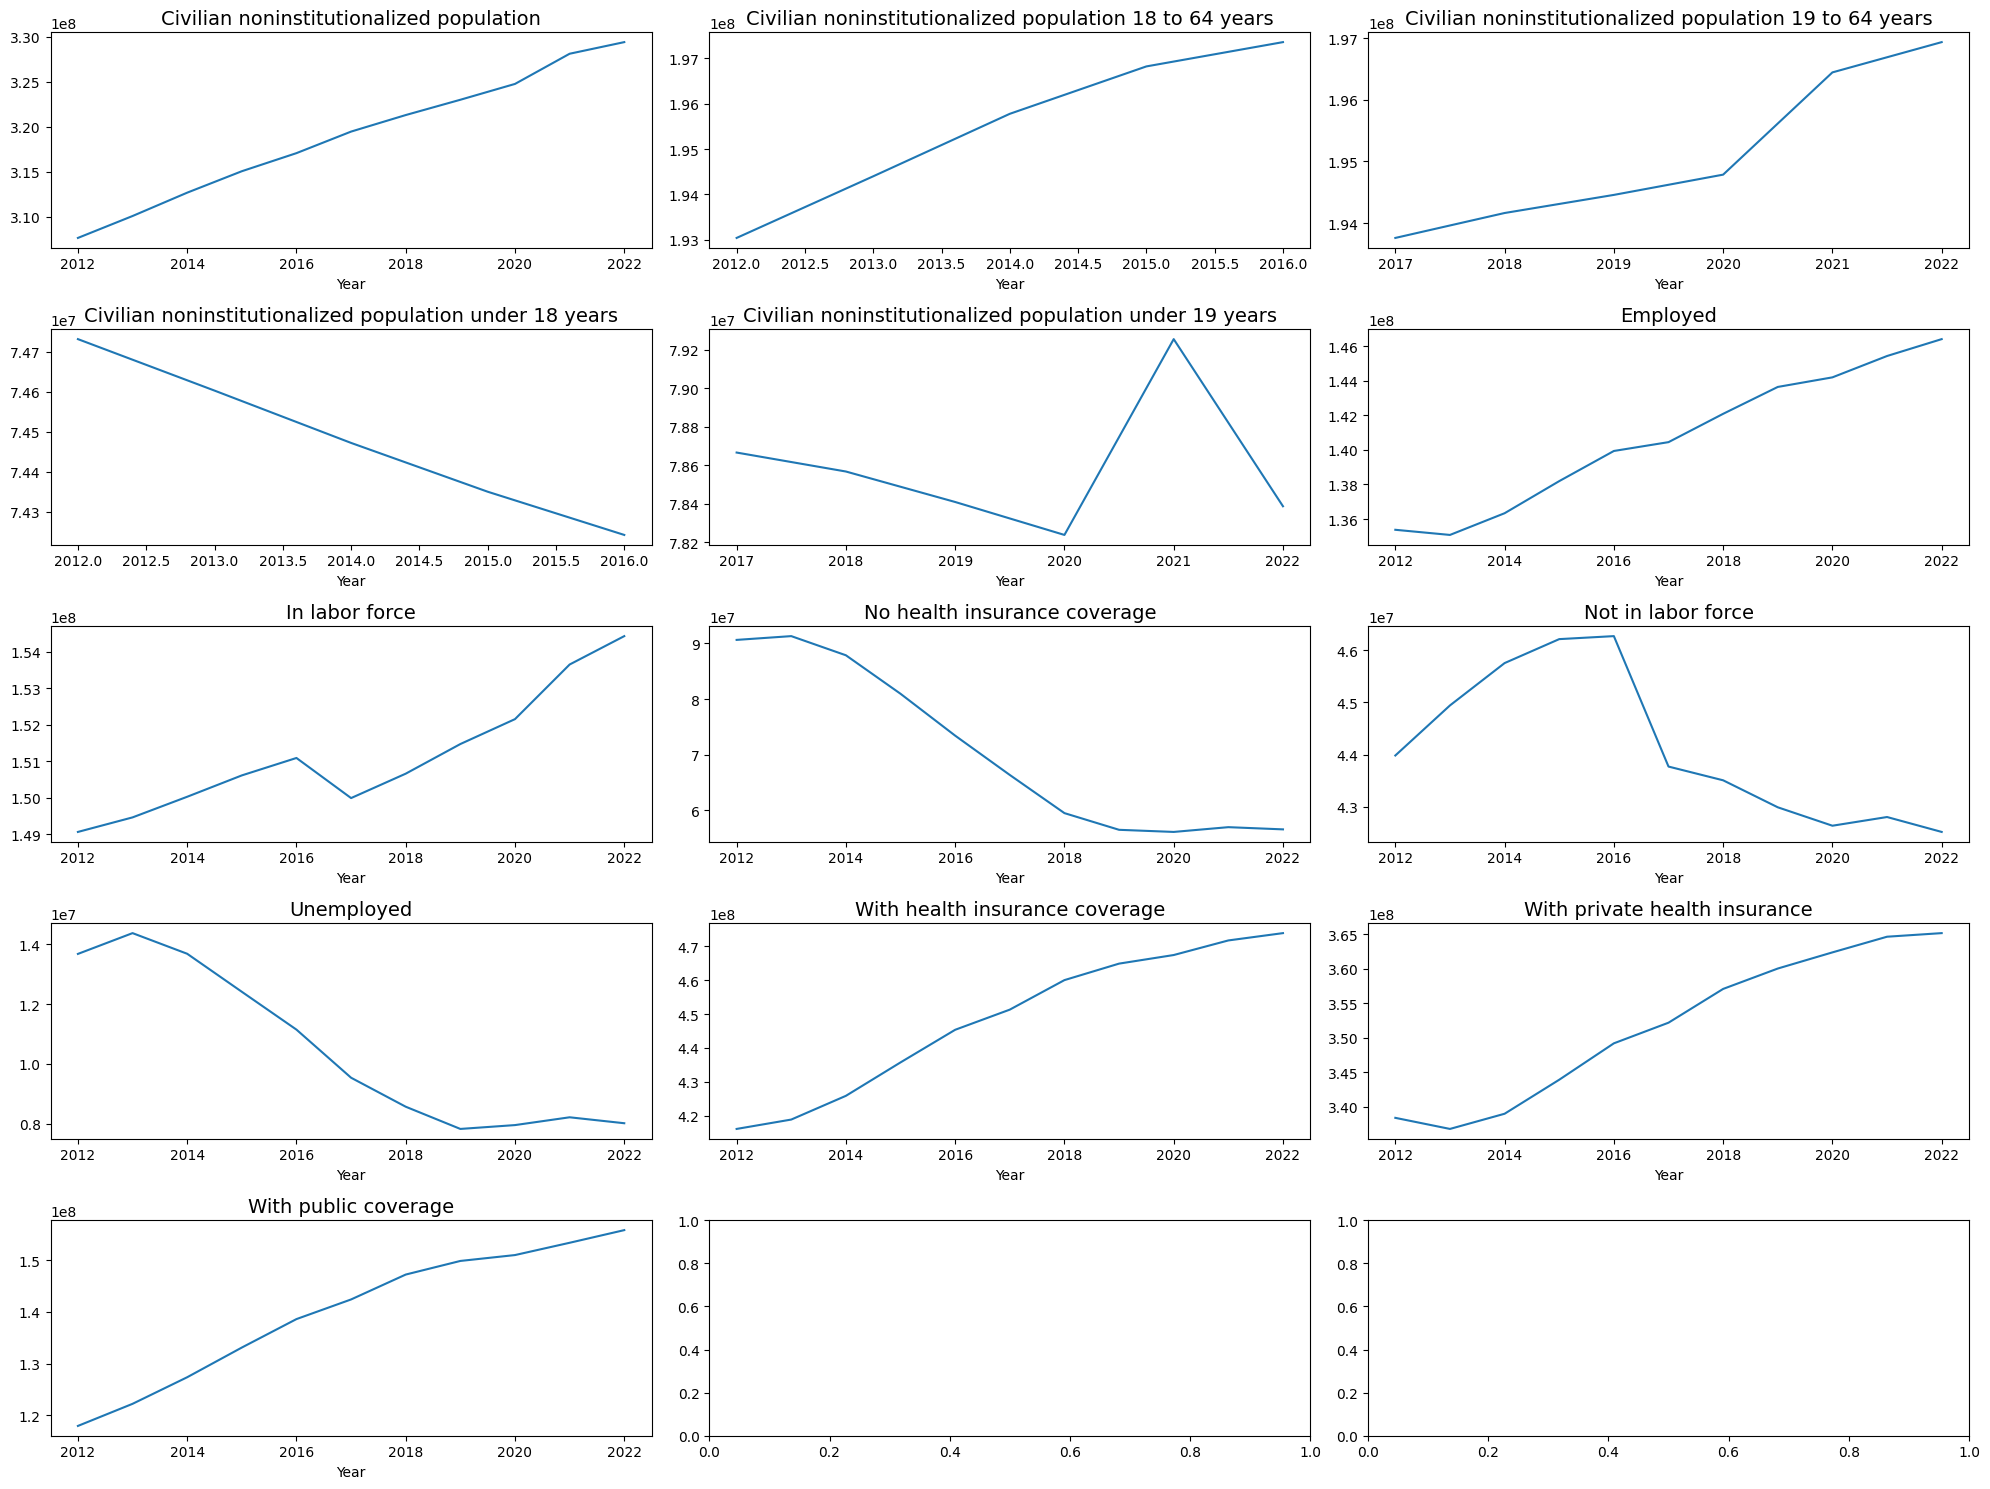

In [16]:
# Plot lineplot for each label group (aggregated by all states)

US_HIC_group = economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'].groupby(['Label (Grouping)','Year'])
US_HIC_df = US_HIC_group['Estimate'].sum()

num_cols = 3
num_rows = len(US_HIC_df.index.get_level_values(0).unique()) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 3*num_rows))

for i, label in enumerate(US_HIC_df.index.get_level_values(0).unique()):
    ax = axes[i // num_cols, i % num_cols]
    US_HIC_df.loc[label,:].plot(ax=ax)

    ax.set_title(label, fontsize=14)
    plt.tight_layout()


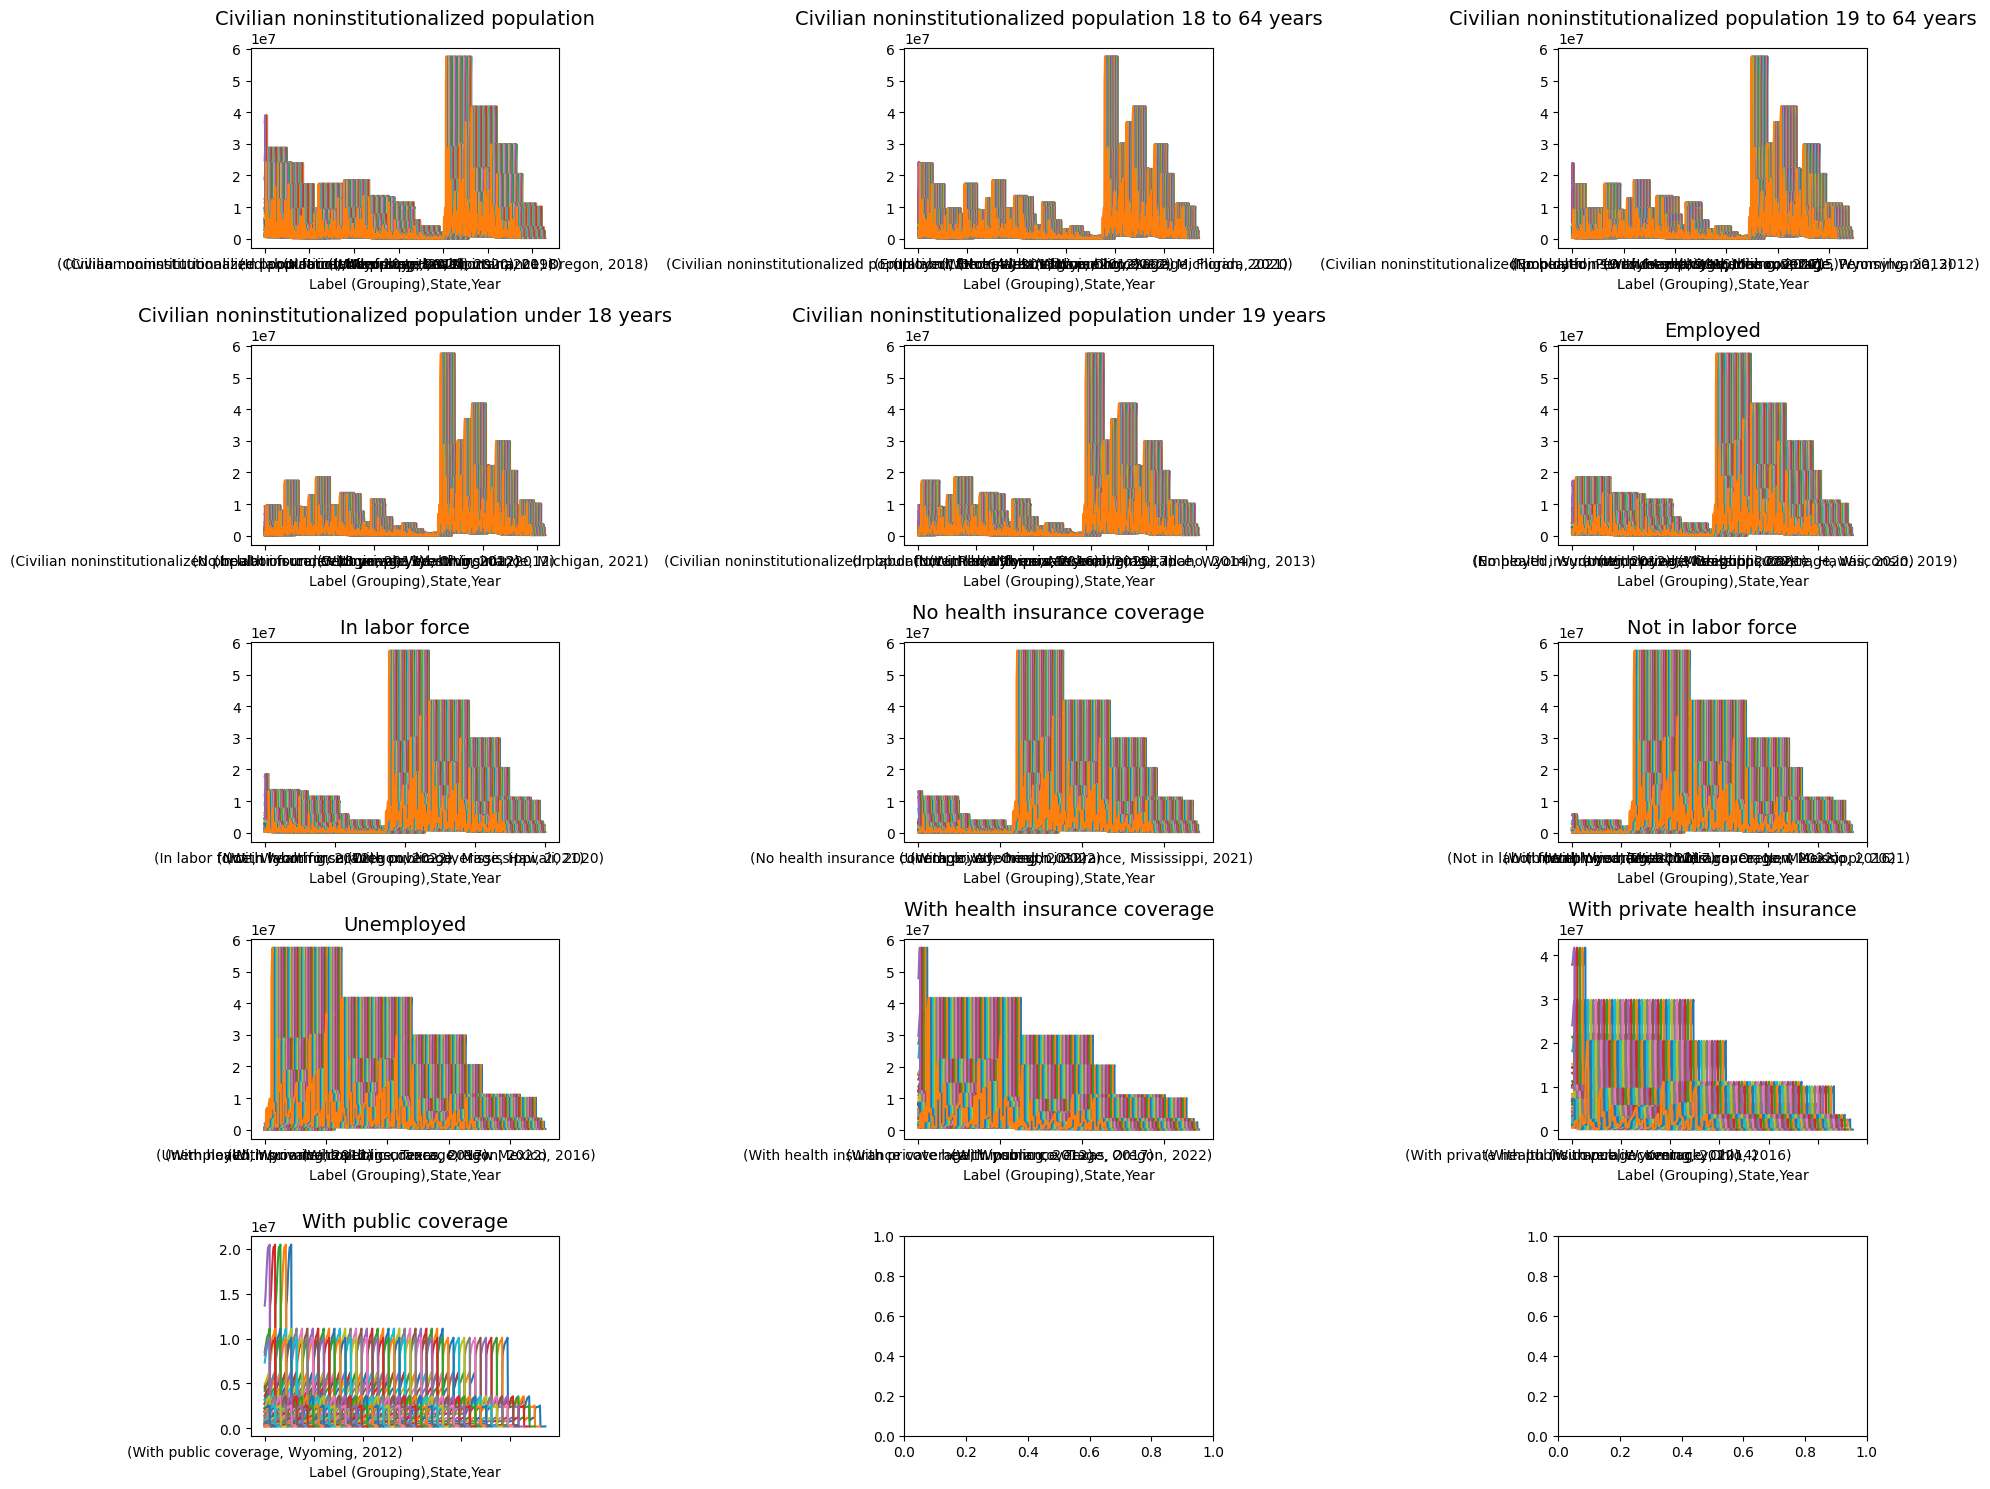

In [17]:
# Plot lineplot for each label group (aggregated by all states)

US_states_HIC_group = economic_df[economic_df['Category']=='HEALTH INSURANCE COVERAGE'].groupby(['Label (Grouping)','State', 'Year'])
US_states_HIC_df = US_states_HIC_group['Estimate'].sum()

num_cols = 3
num_rows = len(US_HIC_df.index.get_level_values(0).unique()) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 3*num_rows))

for i, label in enumerate(US_states_HIC_df.index.get_level_values(0).unique()):
    ax = axes[i // num_cols, i % num_cols]
    for state in US_states_HIC_df.index.get_level_values(1).unique():
        US_states_HIC_df.loc[(label,state):].plot(ax=ax)

    ax.set_title(label, fontsize=14)
    plt.tight_layout()

### Income and benefits

In [19]:
IB_df = economic_df[economic_df['Category']=='INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)']

In [21]:
IB_df['Label (Grouping)'].unique()

array(['Total households', 'Less than $10,000', '$10,000 to $14,999',
       '$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999',
       '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $149,999',
       '$150,000 to $199,999', '$200,000 or more',
       'Median household income (dollars)',
       'Mean household income (dollars)', 'With earnings',
       'Mean earnings (dollars)', 'With Social Security',
       'Mean Social Security income (dollars)', 'With retirement income',
       'Mean retirement income (dollars)',
       'With Supplemental Security Income',
       'Mean Supplemental Security Income (dollars)',
       'With cash public assistance income',
       'Mean cash public assistance income (dollars)',
       'With Food Stamp/SNAP benefits in the past 12 months', 'Families',
       'Median family income (dollars)', 'Mean family income (dollars)',
       'Per capita income (dollars)', 'Nonfamily households',
       'Median nonfamily income (dollars)',
  

In [22]:
IB_df[IB_df['Label (Grouping)']=='Mean earnings (dollars)']

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
75470,Mean earnings (dollars),INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTE...,Alabama,86488.0,520.0,0.0,0.0,2022
75615,Mean earnings (dollars),INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTE...,Alaska,106216.0,1412.0,0.0,0.0,2022
75760,Mean earnings (dollars),INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTE...,Arizona,98850.0,602.0,0.0,0.0,2022
75905,Mean earnings (dollars),INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTE...,Arkansas,83407.0,1051.0,0.0,0.0,2022
76050,Mean earnings (dollars),INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTE...,California,131100.0,372.0,0.0,0.0,2022
76195,Mean earnings (dollars),INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTE...,Colorado,116161.0,661.0,0.0,0.0,2022
76340,Mean earnings (dollars),INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTE...,Connecticut,133799.0,1114.0,0.0,0.0,2022
76485,Mean earnings (dollars),INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTE...,Delaware,102729.0,1523.0,0.0,0.0,2022
76630,Mean earnings (dollars),INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTE...,District of Columbia,157138.0,2334.0,0.0,0.0,2022
76775,Mean earnings (dollars),INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTE...,Florida,96426.0,445.0,0.0,0.0,2022
